In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# df.to_csv('file.csv', index=False)


In [3]:
df = pd.read_csv('file.csv')

In [4]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score
0,M,24,64.5,170.2,22.265918,38000,3
1,F,57,79.1,167.5,28.193362,75000,2
2,M,42,78.8,178.1,24.842676,45000,6
3,F,38,72.9,164.8,26.841891,53000,4
4,F,31,67.2,171.9,22.741417,32000,7
...,...,...,...,...,...,...,...
1005,Male,45,81.0,179.0,25.280110,50000,5
1006,Female,34,63.0,170.0,21.799308,35000,4
1007,Male,54,89.0,182.0,26.868736,70000,6
1008,Female,39,68.0,165.0,24.977043,45000,4


In [5]:
df["Gender"] = df["Gender"].replace({"Female": "F", "Male": "M"})

In [6]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score
0,M,24,64.5,170.2,22.265918,38000,3
1,F,57,79.1,167.5,28.193362,75000,2
2,M,42,78.8,178.1,24.842676,45000,6
3,F,38,72.9,164.8,26.841891,53000,4
4,F,31,67.2,171.9,22.741417,32000,7
...,...,...,...,...,...,...,...
1005,M,45,81.0,179.0,25.280110,50000,5
1006,F,34,63.0,170.0,21.799308,35000,4
1007,M,54,89.0,182.0,26.868736,70000,6
1008,F,39,68.0,165.0,24.977043,45000,4


In [7]:
df['Income($)'] = df['Income($)'].str.replace(',', '').astype(float)


# Target Column

In [8]:
df['Index'] = range(len(df))

In [12]:
df

,Gender,Age,Weight(kg),Height(cm),BMI,Income($),Social Isolation Score,Index
0,M,24,64.5,170.2,22.265918,38000.0,3,0
1,F,57,79.1,167.5,28.193362,75000.0,2,1
2,M,42,78.8,178.1,24.842676,45000.0,6,2
3,F,38,72.9,164.8,26.841891,53000.0,4,3
4,F,31,67.2,171.9,22.741417,32000.0,7,4
...,...,...,...,...,...,...,...,...
1005,M,45,81.0,179.0,25.280110,50000.0,5,1005
1006,F,34,63.0,170.0,21.799308,35000.0,4,1006
1007,M,54,89.0,182.0,26.868736,70000.0,6,1007
1008,F,39,68.0,165.0,24.977043,45000.0,4,1008


### X & Y 

In [10]:
# separate features and target variable
X = df[['Gender','Age','Weight(kg)','Height(cm)','BMI','Income($)','Social Isolation Score']]
y = df.iloc[:, -1]

### Model


Enter your Gender :M
Enter your Age :25
Enter your Weight :73
Enter your Height :173
Enter your Income :60000
Enter your Social Isolation Score :5
How the new User is common 651


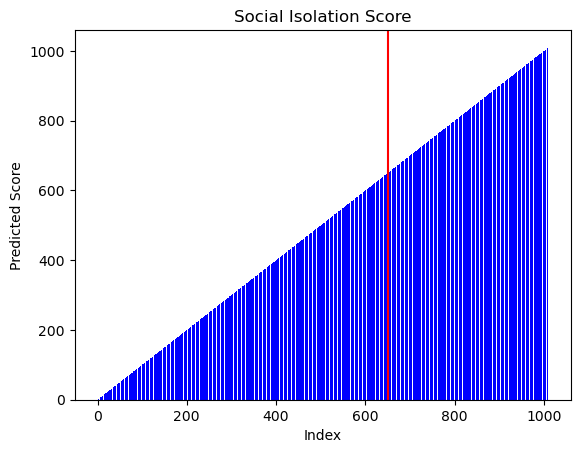


Overall Score: 355/1000
Health Score : -5875
income score : -21311549
How much people are above then you : 35.54455445544555 %


In [28]:
## import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# apply label encoding to categorical data
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# apply feature scaling to the data
scaler = StandardScaler()
X[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI', 'Income($)', 'Social Isolation Score']] = scaler.fit_transform(X[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI', 'Income($)', 'Social Isolation Score']])

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(C=10)
model.fit(X_train, y_train)

# predict on test set and print classification report
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

# example input for a male, 45 years old, 60 kg, 170 cm tall, BMI=23, income=50k, social isolation score=3, located in the US
gen = input('Enter your Gender :')
if gen == 'M':
    gen = 0
elif gen == 'F':
    gen = 1
else:
    print('give proper input')
ag = input('Enter your Age :')
we = input('Enter your Weight :')
he = input('Enter your Height :')
he_m = int(he) / 100 
BMI = int(we)  / (he_m)**2
inc = input('Enter your Income :')
sis = input('Enter your Social Isolation Score :')
new_user = [[gen,ag,we,he,BMI,inc,sis]] 
new_user_df = pd.DataFrame(new_user, columns=['Gender', 'Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score'])

# new_user_df['Gender'] = le.transform(new_user_df['Gender'])

new_user_df[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score']] = scaler.transform(new_user_df[['Gender','Age', 'Weight(kg)', 'Height(cm)','BMI',  'Income($)', 'Social Isolation Score']])

# predict social isolation score for new user
index_prediction = model.predict(new_user_df)

print("How the new User is common", index_prediction[0])


# ------------------------------------------------------------------

# create a bar chart showing the predicted class for the new user
plt.bar(df.index,y, color='b')
# plt.bar([len(df)], [index_prediction[0]], color='r')

# set plot properties
plt.title('Social Isolation Score')
plt.xlabel('Index')
plt.ylabel('Predicted Score')
# plt.xticks(np.append(df.index, len(df)))

# add a vertical red line at the position of the new user index
plt.axvline(x=[index_prediction[0]], color='r')

plt.show()

# -------------------------------------------------------------
overall_score = round((1 - ([index_prediction[0]][0] / len(df))) * 1000)

# calculate individual scores
health_score = round((1 - (BMI / df['BMI'].max())) * 1000)
income_score = round((1 - (int(inc) / df['Income($)'].max())) * 1000)
social_isolation_score = round((1 - (int(sis) / df['Social Isolation Score'].max())) * 1000)
overall_score

# -------------------------------------------------------------

percentage = ([index_prediction[0]][0] ) / len(df) * 100
common_men = 100-percentage
# ------------------------------------------------------------

print(f"\nOverall Score: {overall_score}/1000")
print('Health Score :',health_score)
print('income score :',income_score)
# print('social isolation score :',social_isolation_score)
print('How much people are above then you :',common_men,'%')


These scores are calculated by subtracting the user's input values from the maximum value in the dataset and then scaling the result to a range of 0 to 1000. Since the maximum value in the dataset is likely to be higher than the user's input values, subtracting the input value from the maximum value results in a negative value, which is then scaled to a score between 0 and 1000.

Therefore, the negative values for these scores are expected, and they indicate how far the user's input values are from the maximum values in the dataset. A higher score indicates that the user's input value is closer to the maximum value in the dataset, while a lower score indicates that the user's input value is further away from the maximum value in the dataset.

In [29]:
# bmi = weight / (height / 100) ** 2